### Autencoder: 고차원 입력자료를 정보의 손실없이 저차원의 잠재변수로 축약, 이후 잠재변수로 부터 재생한 입력자료가 원래의 입력자료를 그대로 구현시키는 것이 목적



In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
import tensorflow.keras.backend as K

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


In [ ]:
# reshape to (28, 28, 1) and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train.shape

(60000, 28, 28, 1)

###오토인코더 적용-인코더

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________


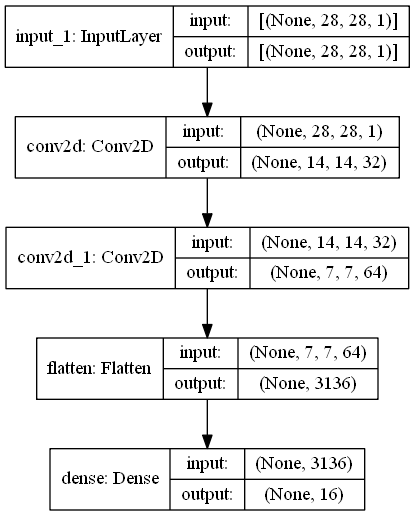

In [ ]:
inputs = Input(shape=(28,28,1))
x=Conv2D(32,3,activation='relu', strides=2, padding='same')(inputs)
x=Conv2D(64,3,activation='relu', strides=2, padding='same')(x)

shape = K.int_shape(x)
x = Flatten()(x)
latent_z = Dense(16)(x)

encoder = Model(inputs,latent_z)
encoder.summary()
plot_model(encoder,
           to_file='encoder.png',
           show_shapes=True)


###오토인코더 적용-디코더

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              53312     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 108,993
Trainable params: 108,993
Non-trainable params: 0
_____________________________________________________

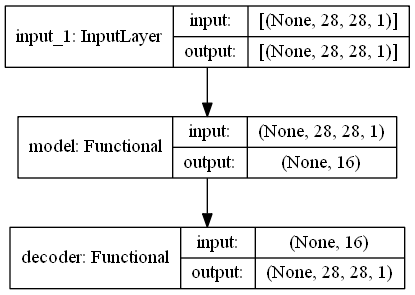

In [ ]:
latent_inputs = Input(shape=(16,))
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = Conv2DTranspose(64,3,activation='relu',strides=2,padding='same')(x)
x = Conv2DTranspose(32,3,activation='relu',strides=2,padding='same')(x)
x_tilde= Conv2DTranspose(1,3,activation='sigmoid',padding='same')(x)

decoder = Model(latent_inputs, x_tilde, name='decoder')
decoder.summary()
plot_model(decoder, to_file='decoder.png', show_shapes=True)

autoencoder = Model(inputs,
                    decoder(encoder(inputs)))
autoencoder.summary()
plot_model(autoencoder,
           to_file='autoencoder.png',
           show_shapes=True)


In [ ]:
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0414 - val_loss: 0.0105
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0089 - val_loss: 0.0083
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0082 - val_loss: 0.0079
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 9/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 50s 27m

In [ ]:
x_decoded = autoencoder.predict(x_test)

imgs = np.concatenate([x_test[:8], x_decoded[:8]])#tf.keras는 axis=-1
imgs.shape

(16, 28, 28, 1)

In [ ]:
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs.shape

(4, 4, 28, 28)

In [ ]:
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs.shape

(112, 112)

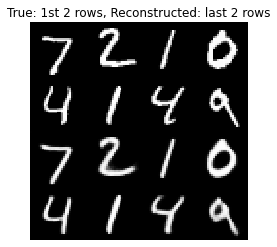

In [ ]:
plt.figure()
plt.axis('off')
plt.title('True: 1st 2 rows, Reconstructed: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()


In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = np.reshape(x_train, [-1, 28, 28, 1])
x_test = np.reshape(x_test, [-1, 28, 28, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noise = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noise = x_test + noise

# adding noise may exceed normalized pixel values>1.0 or <0.0
# clip pixel values >1.0 to 1.0 and <0.0 to 0.0
x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

inputs = Input(shape=(28,28,1))
x=Conv2D(32,3,activation='relu', strides=2, padding='same')(inputs)
x=Conv2D(64,3,activation='relu', strides=2, padding='same')(x)

shape = K.int_shape(x)
x = Flatten()(x)
latent_z = Dense(16)(x)

encoder = Model(inputs,latent_z)

latent_inputs = Input(shape=(16,))
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = Conv2DTranspose(64,3,activation='relu',strides=2,padding='same')(x)
x = Conv2DTranspose(32,3,activation='relu',strides=2,padding='same')(x)
x_tilde= Conv2DTranspose(1,3,activation='sigmoid',padding='same')(x)

decoder = Model(latent_inputs, x_tilde, name='decoder')
autoencoder = Model(inputs,decoder(encoder(inputs)))
autoencoder.compile(loss='mse', optimizer='adam')

autoencoder.fit(x_train_noise,
                x_train,
                validation_data=(x_test_noise, x_test),
                epochs=10,
                batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 472us/step - loss: 0.0344 - val_loss: 0.0202
Epoch 2/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.0192 - val_loss: 0.0181
Epoch 3/10
60000/60000 [==============================] - 28s 472us/step - loss: 0.0176 - val_loss: 0.0169
Epoch 4/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 5/10
60000/60000 [==============================] - 28s 473us/step - loss: 0.0163 - val_loss: 0.0161
Epoch 6/10
60000/60000 [==============================] - 29s 475us/step - loss: 0.0160 - val_loss: 0.0162
Epoch 7/10
60000/60000 [==============================] - 29s 475us/step - loss: 0.0157 - val_loss: 0.0160
Epoch 8/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.0154 - val_loss: 0.0158
Epoch 9/10
60000/60000 [==============================] - 28s 471us/step - loss: 0.0153 - val_

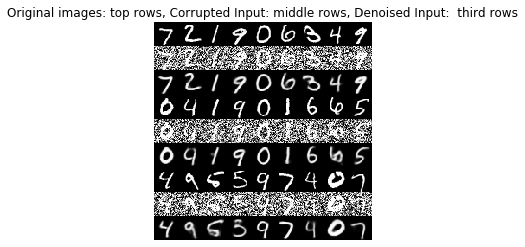

In [ ]:
x_decoded = autoencoder.predict(x_test_noise)

imgs = np.concatenate([x_test[:27], x_test_noise[:27], x_decoded[:27]])
imgs = imgs.reshape((9,9, x_test.shape[1],x_test.shape[1]))
imgs = np.vstack(np.split(imgs, 3, axis=1))
imgs = imgs.reshape((9, -1, x_test.shape[1],x_test.shape[1]))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure()
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as k
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import numpy as np

In [ ]:
img_shape=(28,28,1)
batch_size=16
latent_dim=2

input_img=layers.Input(shape=img_shape)
x=layers.Conv2D(32,3,padding='same', strides=2, activation='relu')(input_img)
x=layers.Conv2D(64,3, padding='same', strides=2, activation='relu')(x)
shape=k.int_shape(x)
x=layers.Flatten()(x)
x=layers.Dense(32, activation='relu')(x)
z_mean=layers.Dense(latent_dim)(x)
z_log_var=layers.Dense(latent_dim)(x)

In [ ]:
def sampling(args):
    z_mean,z_log_var=args
    batch=k.shape(z_mean)[0]
    dim=k.int_shape(z_mean)[1]
    epsilon=tf.random.normal(shape=(batch,dim))
    return z_mean+tf.exp(0.5*z_log_var)*epsilon
#z=layers.Lambda(sampling,output_shape=(latent_dim,))([z_mean,z_log_var])
z=layers.Lambda(sampling)([z_mean,z_log_var])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 64)     18496       conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 3136)         0           conv2d_1[0][0]                   
______________________________________________________________________________________________

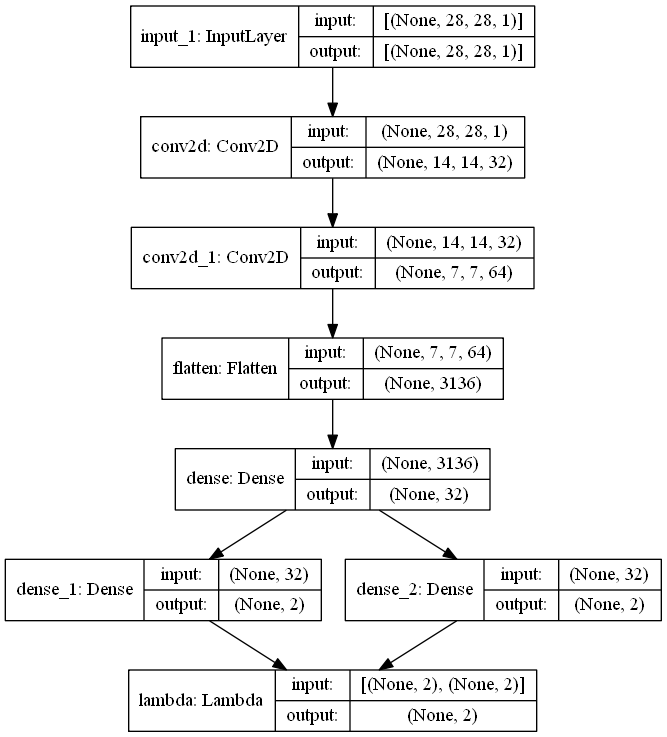

In [ ]:
encoder=Model(input_img,[z_mean, z_log_var, z])
encoder.summary()
plot_model(encoder,show_shapes=True)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

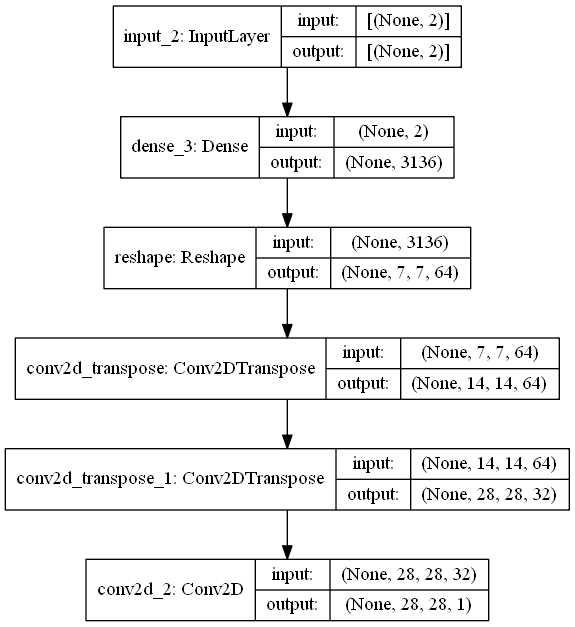

In [ ]:
latent_input=layers.Input(shape=(latent_dim,))
x=layers.Dense(np.prod(shape[1:]), activation='relu')(latent_input)
x=layers.Reshape(shape[1:])(x)
x=layers.Conv2DTranspose(64,3,padding='same',strides=2,activation='relu')(x)
x=layers.Conv2DTranspose(32,3,padding='same',strides=2,activation='relu')(x)
output=layers.Conv2D(1,3, padding='same',activation='sigmoid')(x)
decoder=Model(latent_input,output)
decoder.summary()
plot_model(decoder, show_shapes=True)

In [ ]:
f_output=decoder(encoder(input_img)[2])
vae=Model(input_img, f_output)
vae.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Functional)           [(None, 2), (None, 2), (N 119332    
_________________________________________________________________
model_1 (Functional)         (None, 28, 28, 1)         65089     
Total params: 184,421
Trainable params: 184,421
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inference_loss=1+z_log_var-tf.square(z_mean)-tf.exp(z_log_var)
inference_loss=k.sum(inference_loss, axis=-1)*-0.5/(input_img.shape[1]*input_img.shape[1])

vae.add_loss(k.mean(inference_loss))
vae.compile(loss='mse', optimizer='rmsprop')

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train,_),(x_test,y_test)=mnist.load_data()
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


vae.fit(x_train, x_train, epochs=10, shuffle=True, batch_size=batch_size, validation_data=(x_test,x_test))

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
3750/3750 [==============================] - 118s 31ms/step - loss: 0.0609 - val_loss: 0.0514
Epoch 2/10
3750/3750 [==============================] - 115s 31ms/step - loss: 0.0508 - val_loss: 0.0493
Epoch 3/10
3750/3750 [==============================] - 192s 51ms/step - loss: 0.0490 - val_loss: 0.0486
Epoch 4/10
3750/3750 [==============================] - 115s 31ms/step - loss: 0.0484 - val_loss: 0.0478
Epoch 5/10
3750/3750 [==============================] - 110s 29ms/step - loss: 0.0479 - val_loss: 0.0481
Epoch 6/10
3750/3750 [==============================] - 115s 31ms/step - loss: 0.0477 - val_loss: 0.0479ss: 
Epoch 7/10
3750/3750 [==============================] - 115s 31ms/step - loss: 0.0476 - val_loss: 0.0478
Epoch 8/10
3750/3750 [==============================] - 115s 31ms/step - loss: 0.0475 - val_loss: 0.0482
Epoch 9/10
3750/3750 [==============================] - 114s 30ms/step - loss: 0.0472 - val

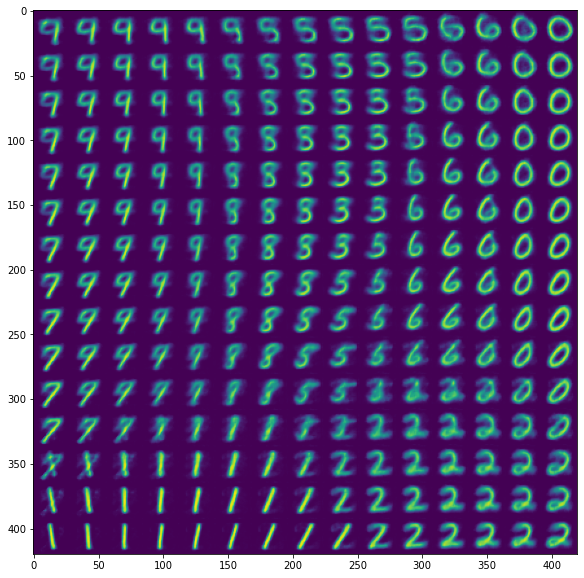

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
n=15
image_size=28
figure=np.zeros((image_size*n,image_size*n))
z_x=norm.ppf(np.linspace(0.05,0.95,n))
z_y=norm.ppf(np.linspace(0.05,0.95,n))

for i,y in enumerate(z_y):
    for j, x in enumerate(z_x):
        z_sample=np.array([[x,y]])
        z_sample=np.tile(z_sample, batch_size).reshape(batch_size,2)
        x_decoded=decoder.predict(z_sample)
        digit=x_decoded[0].reshape(image_size, image_size)
        figure[i*image_size:(i+1)*image_size, j*image_size:(j+1)*image_size]=digit

plt.figure(figsize=(10,10))
plt.imshow(figure)
plt.show()